In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("dataset.csv")

In [14]:
data.head()

,Pattern,Feature1,Feature2,Feature3,Class_Label
0,1,1,0.08,0.72,1
1,2,1,0.10,1.00,1
2,3,1,0.26,0.58,1
3,4,1,0.35,0.95,0
4,5,1,0.45,0.15,1


In [15]:
data = data.drop(['Pattern'], axis=1)

In [16]:
data.head()

,Feature1,Feature2,Feature3,Class_Label
0,1,0.08,0.72,1
1,1,0.10,1.00,1
2,1,0.26,0.58,1
3,1,0.35,0.95,0
4,1,0.45,0.15,1


In [17]:
data[['Class_Label']] = data[['Class_Label']].replace(0, -1)

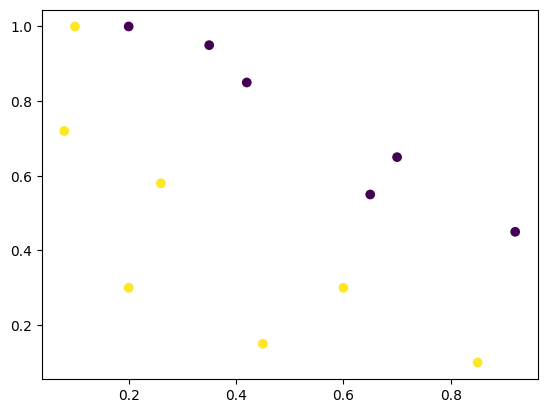

In [18]:
plt.scatter(data['Feature2'], data['Feature3'], c = data['Class_Label'])

In [19]:
class Perceptron: 
    def __init__(self, max_iter=100):
        self.max_iter = max_iter
        

    def fit(self, X, y):
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        
        self.w = np.zeros((1, X.shape[1])) 
                        
        for _ in range(self.max_iter):
            error_found = False
            
            w = self.w.copy()

            for i in range(X.shape[0]):                
                pred = np.dot(X[i], self.w.T)

                if y[i] * pred <= 0:
                    w += y[i] * X[i]
                    error_found = True
            
            if not error_found:
                break
            
            self.w = w.copy()

        return self

    def predict(self, X):        
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

        return np.sign(np.dot(X, self.w.T))        

In [20]:
X = data[['Feature2', 'Feature3']].values
y = data[['Class_Label']].values

In [21]:
model = Perceptron().fit(X, y)
model.w

array([[-11.69, -11.72,  14.  ]])

In [22]:
y_pred = model.predict(X).flatten()

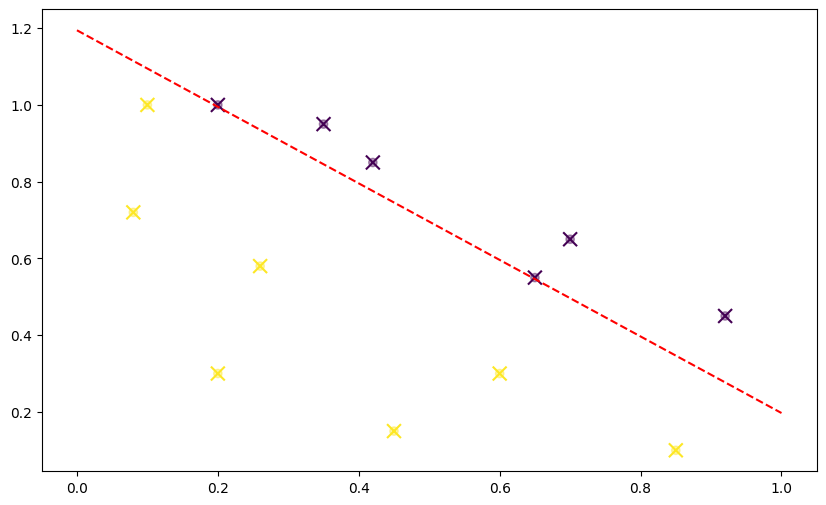

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = y, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, marker='x', s=100)
plt.plot([0, 1], [-model.w[0, 2]/model.w[0, 1], -(model.w[0, 2] + model.w[0, 0])/model.w[0, 1]], 'r--',)